__Cuaderno de trabajo de:__ Nombre Apellido

# Pandas

Antes de poder hacer estadística descriptiva, o inferencia estadística, es necesario recolectar los datos, y es muy conveniente cargarlos en el ordenador en un formato adecuado.
También es importante *inspeccionar* y *previsualizar* esos datos para detectar posibles errores en los propios datos o en alguna de las fases del proceso de recolección.

`pandas` es una librería de python cuyo objetivo es ayudar en estas fases previas al análisis estadístico, para simplificar el trabajo posterior.

Para ello, `pandas` proporciona los `dataframes`, unas estructuras de datos bidimensionales, similares a las tablas de una hoja de cálculo, fáciles de usar y de alto rendimiento.

## Creación de dataframes

Podemos crear un dataframe a partir de varias Series: cada una actuará a modo de registro en nuestra tabla. Por ejemplo, crearemos una tabla con tres registros y cuyas columnas sean `Cost`, `Item Purchased` y `Name`:

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [12]:
compra_01 = pd.Series({'Nombre': 'Homer',
                        'Artículo': 'Rosquillas',
                        'Precio': 3.70})
compra_02 =  pd.Series({'Nombre': 'Barney',
                        'Artículo': 'Cerveza duff',
                        'Precio': 6.00})
compra_03 =  pd.Series({'Nombre': 'Lenny',
                        'Artículo': 'Leche',
                        'Precio': 4.50})

df = pd.DataFrame([compra_01, compra_02, compra_03], index=['Tienda 01', 'Tienda 02', 'Tienda 03'])

Observamos que basta proporcionarle una serie por cada entrada en nuestra tabla. Además, los campos de la Serie deben ser los mismos a lo largo de cada registro, con el fin de que se pueda formar correctamente la tabla.
El argumento index sirve para introducir identificadores a cada registro. Por defecto será un número entero, pero en este caso hemos utilizado strings.

In [13]:
df.head()

,Nombre,Artículo,Precio
Tienda 01,Homer,Rosquillas,3.7
Tienda 02,Barney,Cerveza duff,6.0
Tienda 03,Lenny,Leche,4.5


Para seleccionar un subconjunto de registros conociendo su índice, podemos utilizar `loc`

In [14]:
df['Precio']

Tienda 01    3.7
Tienda 02    6.0
Tienda 03    4.5
Name: Precio, dtype: float64

In [16]:
df.loc['Tienda 02']

Nombre            Barney
Artículo    Cerveza duff
Precio               6.0
Name: Tienda 02, dtype: object

In [21]:
type(df['Precio'])

pandas.core.series.Series

In [22]:
df.loc['Tienda 01']['Precio']

3.7

In [25]:
df.loc['Tienda 01', 'Precio']

3.7

In [24]:
type(df.loc['Tienda 01', 'Precio'])

numpy.float64

A su vez, estos argumentos pueden ser listas!

In [30]:
df.loc[['Tienda 01', 'Tienda 02']]

,Nombre,Artículo,Precio
Tienda 01,Homer,Rosquillas,3.7
Tienda 02,Barney,Cerveza duff,6.0


In [29]:
df[['Precio','Nombre']].loc[['Tienda 01', 'Tienda 02']]

,Precio,Nombre
Tienda 01,3.7,Homer
Tienda 02,6.0,Barney


In [31]:
df.loc[['Tienda 01', 'Tienda 02']][['Precio','Nombre']]

,Precio,Nombre
Tienda 01,3.7,Homer
Tienda 02,6.0,Barney


Si en lugar de mediante los strings queremos acceder utilizando las posiciones (como enteros), podemos usar `iloc`.
Por ejemplo, el siguiente comando toma las dos primeras filas y todas las columnas

In [32]:
df

,Nombre,Artículo,Precio
Tienda 01,Homer,Rosquillas,3.7
Tienda 02,Barney,Cerveza duff,6.0
Tienda 03,Lenny,Leche,4.5


In [33]:
df.iloc[1:]

,Nombre,Artículo,Precio
Tienda 02,Barney,Cerveza duff,6.0
Tienda 03,Lenny,Leche,4.5


In [34]:
df.iloc[:2,:2]

,Nombre,Artículo
Tienda 01,Homer,Rosquillas
Tienda 02,Barney,Cerveza duff


In [35]:
df[:2]

,Nombre,Artículo,Precio
Tienda 01,Homer,Rosquillas,3.7
Tienda 02,Barney,Cerveza duff,6.0


<br>
Si queremos borrar algún registro conociendo su índice, basta usar `drop`

In [36]:
df2=df.drop('Tienda 01')

In [37]:
df2

,Nombre,Artículo,Precio
Tienda 02,Barney,Cerveza duff,6.0
Tienda 03,Lenny,Leche,4.5


In [38]:
#Atención: df sigue igual que antes
df

,Nombre,Artículo,Precio
Tienda 01,Homer,Rosquillas,3.7
Tienda 02,Barney,Cerveza duff,6.0
Tienda 03,Lenny,Leche,4.5


El comando `drop`, por defecto, crea una copia con el nuevo dataframe actualizado. En lugar de `df2 = df.drop(...)` podemos hacer lo siguiente para que la actualización se realice en el mismo lugar de memoria del objeto `df`

```python
df.drop('Tienda 01', inplace=True)
```

> **pandas suele devolver un nuevo DataFrame, sin modificar el DataFrame original**

In [39]:
df.drop('Tienda 01', inplace=True)
df

,Nombre,Artículo,Precio
Tienda 02,Barney,Cerveza duff,6.0
Tienda 03,Lenny,Leche,4.5


### Otra forma de crear DataFrames

Podemos pasar a ``pd.DataFrame`` como argumento un diccionario, donde las claves del diccionario son los nombres de las columnas y los valores son listas con los datos.
*Todas las listas deben tener la misma longitud.*

In [40]:
df = pd.DataFrame(data = {
    "Cálculo": [10,5,8,7],
    "Álgebra": [8,7,6,5],
    },
    index = ["Jaimita", "Fulano", "Mengano", "Zutanita"],
)
df

,Cálculo,Álgebra
Jaimita,10,8
Fulano,5,7
Mengano,8,6
Zutanita,7,5


## Carga de dataframes

El trabajo normalmente no comienza con datos creados en el código, si no que éstos ya se encontrarán en archivos del disco duro. Pandas cuenta con funciones para leer el contenido de estos archivos, y volcarlos a un dataframe.

De todas formas es importante poder crear nuevos DataFrames a partir de los que leemos del disco duro.

Las funciones que se ocupan de esto comienzan por `pd.read_...`. Existen para documentos excel, html, json. Nosotros utilizaremos la más común, `pd.read_csv`, que lee del respectivo archivo .csv (cada fila es un registro de la tabla, y los valores están separados por comas).

In [43]:
pd.read_csv?

A continuación cargaremos datos `tips.csv` en un `dataframe` de `pandas`. Esta base de datos, contiene información acerca de las cuentas de un restaurante. En concreto contiene las siguientes variables:

* `total_bill`: Valor de la cuenta.
* `tip`: Valor de la propina.
* `sex`: Género del pagador (Femal/Male).
* `smoker`: Variable categórica que indica si el pagador es o no fumador (Yes/No).
* `day`: Día de la semana.
* `time`: Variable categórica que indica si la cuenta corresponde a una comida o una cena (Dinner/Lunch).
* `size`: Número de comensales en la mesa.

In [45]:
tips = pd.read_csv('tips.csv')

Además del nombre del archivo con los datos, `read_csv` tiene otros argumentos opcionales. Los más utilizados son:
    
* nrows: lee solo cierto número de filas (útil para hacer una prueba antes de procesar un archivo muy grande).
* usecols: el dataframe resultante solo tendrá estas columnas
* dtype: especifica el tipo de cada columna (por defecto, pandas trata de inferirlo automáticamente de los datos, pero a veces es necesario: por ejemplo para que lea un número como string en lugar de int).

# Análisis exploratorio

Una vez ya tenemos los datos cargados, podemos echarles un vistazo mediante las siguientes cuatro funciones: `head` y `tail` para observar las primeras y últimas filas, respectivamente, `describe` para obtener algunos estadísticos básicos, e `info` para obtener datos sobre los tipos

In [46]:
tips.head(10) #Entre paréntesis, el número de entradas que queremos mostrar. Por defecto,
            # este número es 5.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [47]:
tips.tail(3)

,total_bill,tip,sex,smoker,day,time,size
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [48]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Para datos de tipo numérico, `describe` proporciona información del número de valores no omitidos (count), la media, la desviación estándar, los valores mínimo y máximo y algunos cuantiles, entre ellos la mediana (50%).

En el caso de que la tabla contenga tanto datos numéricos como categóricos, `describe` por defecto solo muestra los estadísticos para las numéricas. Si queremos que también muestre los otros:

In [29]:
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


Para las variables categóricas, se muestran los nuevos estadísticos de: número de valores únicos, valor más frecuente (top) y frecuencia de éste. Por ejemplo, para el caso del sexo, hay 244 anotaciones, y el valor más frecuente es Male (157 de 244), además de tener dos valores únicos (por lo que asumiremos que el otro valor es Female)

In [30]:
tips.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


## Consultas de dataframes

Hasta ahora hemos visto como acceder a ciertos registros y/o ciertas columnas de nuestra tabla. Veremos ahora algunas funciones nuevas para realizar consultas más dinámicas.

Una forma rápida de acceder a una columna entera es

In [31]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [32]:
tips[['tip', 'sex']].head(2)

,tip,sex
0,1.01,Female
1,1.66,Male


In [33]:
tips['total_bill'].head(10)

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
5    25.29
6     8.77
7    26.88
8    15.04
9    14.78
Name: total_bill, dtype: float64

Si el nombre de la columna es un nombre de variable válido, tb se puede hacer:

In [34]:
tips.total_bill.head()

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64

Por supuesto dibujar gráficas es una buena forma de explorar los datos, y detectar si hemos importado los datos correctamente. La próxima semana trataremos este tema con más detalle, esta semana sólo dibujaremos **histogramas** y **scatter plots**.

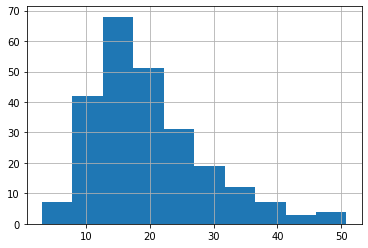

In [35]:
tips['total_bill'].hist()

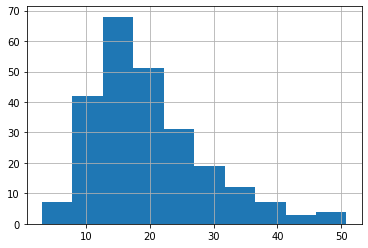

In [36]:
tips.total_bill.hist()

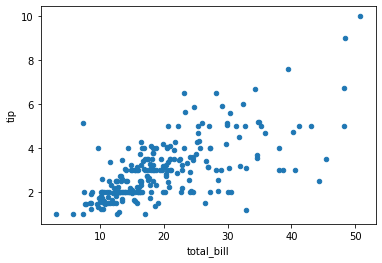

In [37]:
tips.plot.scatter('total_bill', 'tip')

Podemos utilizar una sintaxis muy similar a la de numpy para, por ejemplo, calcular la media o la mediana de una serie de datos:

In [38]:
tips['size']

0      2
1      3
2      3
3      2
4      4
      ..
239    3
240    2
241    2
242    2
243    2
Name: size, Length: 244, dtype: int64

In [39]:
tips['total_bill'].median()

17.795

In [40]:
tips['size'].mean()

2.569672131147541

...o para encontrar los registros cuyo valor es mayor que la mediana

In [41]:
size_median= tips['size'].median()
tips['size'] > size_median

0      False
1       True
2       True
3      False
4       True
       ...  
239     True
240    False
241    False
242    False
243    False
Name: size, Length: 244, dtype: bool

La consulta anterior nos ha generado un array booleano, y **podemos utilizarlo para seleccionar filas en nuestro dataframe**:

In [42]:
mesas_grandes = tips[ tips['size'] > size_median ]
print(len(tips), len(mesas_grandes))
mesas_grandes.head()

244 84


,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4


Observamos que conserva los índices de la tabla original. Si queremos resetearlos, basta con hacer

In [43]:
mesas_grandes.reset_index(inplace=True, drop=True)
mesas_grandes.head()

,total_bill,tip,sex,smoker,day,time,size
0,10.34,1.66,Male,No,Sun,Dinner,3
1,21.01,3.50,Male,No,Sun,Dinner,3
2,24.59,3.61,Female,No,Sun,Dinner,4
3,25.29,4.71,Male,No,Sun,Dinner,4
4,26.88,3.12,Male,No,Sun,Dinner,4


Los criterios de filtrado de filas pueden ser tan complejos como queramos, utilizando los operadores lógicos:

 - ``&``: el operador lógico **"y"**
 - ``|``: el operador lógico **"o"** (no excluyente)

In [44]:
tips[ (tips['size'] > 2)][(tips['sex'] == 'Female') ].head()

<ipython-input-44-c9d5083e1ed5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tips[ (tips['size'] > 2)][(tips['sex'] == 'Female') ].head()


,total_bill,tip,sex,smoker,day,time,size
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
16,10.33,1.67,Female,No,Sun,Dinner,3
18,16.97,3.50,Female,No,Sun,Dinner,3
33,20.69,2.45,Female,No,Sat,Dinner,4


In [45]:
tips[ (tips['size'] > 2) & (tips['sex'] == 'Female') ].head()

,total_bill,tip,sex,smoker,day,time,size
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
16,10.33,1.67,Female,No,Sun,Dinner,3
18,16.97,3.50,Female,No,Sun,Dinner,3
33,20.69,2.45,Female,No,Sat,Dinner,4


In [46]:
tips[ (tips['size'] > 2) | (tips['sex'] == 'Female') ].head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4


### Ejemplo

  - ¿Cuántas registros hay en la base de datos en la que las propinas sean de al menos el 50% de la propina máxima de la base de datos?

### Ejercicio 1

 - Carga la tabla `olympics.csv`, indicando a pandas que la primera columna sea el index (index_col=0). 

Los datos provienen del [medallero en la wikipedia](https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table)

 - Realiza un análisis exploratorio de los datos.
 - El fichero tiene una peculiaridad que es necesario tratar, ¿la has encontrado ya? Si no la has encontrado, sigue adelante, porque aparecerá antes o después.
 - ¿Cuál es el máximo de medallas total entre todos los países? ¿A qué país corresponde?
 - ¿Qué países han conseguido al menos la tercera parte de las medallas de USA?
 - Obtén los países que hayan obtenido más medallas (cuenta cada tipo de medalla por igual) en inverno que en verano.

In [47]:
olympics = pd.read_csv('olympics.csv',index_col=0)

## Creando nuevas columnas

Si queremos añadir una nueva columna a nuestra tabla, es tan sencillo como realizar una nueva asignación

In [48]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [49]:
#Un valor constante
tips['col_vacia'] = 2.3
tips.head()

,total_bill,tip,sex,smoker,day,time,size,col_vacia
0,16.99,1.01,Female,No,Sun,Dinner,2,2.3
1,10.34,1.66,Male,No,Sun,Dinner,3,2.3
2,21.01,3.50,Male,No,Sun,Dinner,3,2.3
3,23.68,3.31,Male,No,Sun,Dinner,2,2.3
4,24.59,3.61,Female,No,Sun,Dinner,4,2.3


También podemos crear columnas utilizando funciones de numpy, por ejemplo, ahora la rellenaremos con valores aleatorios provenientes de una distribución Normal(0,1)

In [50]:
tips['col_random'] = np.random.randn(len(tips))
tips.head()

,total_bill,tip,sex,smoker,day,time,size,col_vacia,col_random
0,16.99,1.01,Female,No,Sun,Dinner,2,2.3,-0.939151
1,10.34,1.66,Male,No,Sun,Dinner,3,2.3,0.047677
2,21.01,3.50,Male,No,Sun,Dinner,3,2.3,-0.461815
3,23.68,3.31,Male,No,Sun,Dinner,2,2.3,0.118476
4,24.59,3.61,Female,No,Sun,Dinner,4,2.3,-1.531382


También es posible combinarlos con otras columnas de la tabla, siempre que las dimensiones lo permitan (en este caso, que tengan el mismo número de elementos)

In [51]:
tips['total_bill_rand'] = np.random.randn(len(tips)) + tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,col_vacia,col_random,total_bill_rand
0,16.99,1.01,Female,No,Sun,Dinner,2,2.3,-0.939151,16.171030
1,10.34,1.66,Male,No,Sun,Dinner,3,2.3,0.047677,10.619009
2,21.01,3.50,Male,No,Sun,Dinner,3,2.3,-0.461815,20.209063
3,23.68,3.31,Male,No,Sun,Dinner,2,2.3,0.118476,23.583718
4,24.59,3.61,Female,No,Sun,Dinner,4,2.3,-1.531382,25.395881


In [52]:
tips['total_bill_log'] = np.log(tips['total_bill'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,col_vacia,col_random,total_bill_rand,total_bill_log
0,16.99,1.01,Female,No,Sun,Dinner,2,2.3,-0.939151,16.171030,2.832625
1,10.34,1.66,Male,No,Sun,Dinner,3,2.3,0.047677,10.619009,2.336020
2,21.01,3.50,Male,No,Sun,Dinner,3,2.3,-0.461815,20.209063,3.044999
3,23.68,3.31,Male,No,Sun,Dinner,2,2.3,0.118476,23.583718,3.164631
4,24.59,3.61,Female,No,Sun,Dinner,4,2.3,-1.531382,25.395881,3.202340


### Ejercicio 2

Trabajaremos sobre olympics. Se asignan puntos de la siguiente forma: bronce 1, plata 2, oro 3.

 - Expande el DataFrame ``olympics`` con los puntos que ha obtenido cada país, en las olimpiadas de invierno y en las de verano.
 - Encuentra el país que ha obtenido más puntos, y los países que hayan obtenido al menos el 25% del máximo de puntos.
 - Obtén los países que hayan obtenido más puntos en inverno que en verano.
 - Divide el total de puntos por el número de olimpiadas en las que ha participado (Nsummers), y obtén los países que tienen un promedio de al menos el 50% del máximo

### Comentarios finales

Otros años también importamos un archivo distinto con la población de cada país, para poder comparar el total de medallas dividido por el número de participaciones y por la población del país. Este año hemos recortado esa parte. Si algún día necesitáis combinar datos de dos fuentes, preguntadme, o buscad como combinar dataframes usando ``merge``.